In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
datapath = "/Users/whysocurious/Documents/MLDSAIProjects/cust-seg-case-study/data"
dfcust = pd.read_csv(datapath+'/customer_data_imputed.csv')#(datapath+'/Customer Segmentation.csv')
print (f"Data shape: {dfcust.shape}")
print (f"Data columns: {dfcust.columns.tolist()}")
print (f"Data types:\n{dfcust.dtypes}")
print (f"Missing values:\n{dfcust.isnull().sum()}")
dfcust.head()

Data shape: (8363, 9)
Data columns: ['Customer ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']
Data types:
Customer ID          int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
dtype: object
Missing values:
Customer ID        0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64


,Customer ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0


In [3]:
for col in dfcust.columns:
    if dfcust[col].dtype == 'object':
        print(f"Unique values in {col}: {dfcust[col].unique()[:5]}\n")  # Display first 5 unique values for object columns
    else:
        print(f"Statistics for {col}:\n{dfcust[col].describe()}\n")  # Display statistics for numerical columns

Statistics for Customer ID:
count      8363.000000
mean     463474.382997
std        2597.369734
min      458982.000000
25%      461224.500000
50%      463468.000000
75%      465736.500000
max      467974.000000
Name: Customer ID, dtype: float64

Unique values in Gender: ['Male' 'Female']

Unique values in Ever_Married: ['Yes' 'No']

Statistics for Age:
count    8363.000000
mean       43.838814
std        16.828683
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

Unique values in Graduated: ['Yes' 'No']

Unique values in Profession: ['Executive' 'Artist' 'Healthcare' 'Lawyer' 'Marketing']

Statistics for Work_Experience:
count    8363.000000
mean        2.646299
std         3.342552
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

Unique values in Spending_Score: ['High' 'Average' 'Low']

Statistics for Family_

<Axes: title={'center': 'Age Distribution'}, xlabel='Age_Bins'>

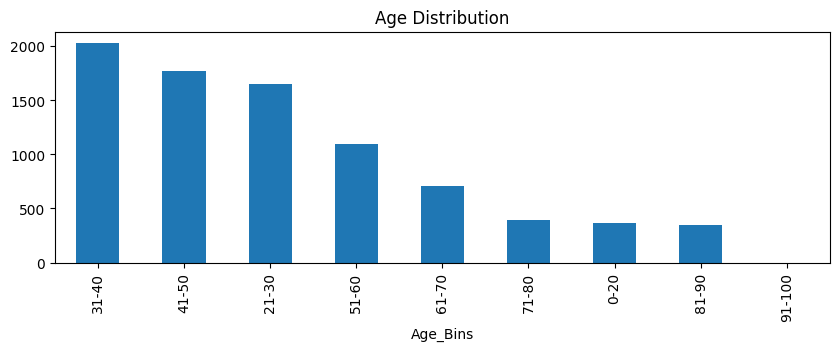

In [4]:
dfcust['Age_Bins'] = pd.cut(dfcust['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
dfcust.Age_Bins.value_counts().plot(kind='bar', title='Age Distribution', figsize=(10, 3))

In [5]:
dfcust.columns

Index(['Customer ID', 'Gender', 'Ever_Married', 'Age', 'Graduated',
       'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Age_Bins'],
      dtype='object')

## Analysing Gender
 - 54.8% Male, 45.2% Female
 - Higher %age of Males ever married, comparatively higher %age of Females never married
 - higher percentage of males across age groups; 0-20 and 51-70 have higher than average males; 31-40 has almost comparable composition by gender
 - Among not graduate population, Males have a very high composition
 - Very high % of Females in Engineering, Homemaker, Marketing; whereas Males have a very high percentage in Entertainment, Executive, Healthcare; Lawyer, Artists have equal gender distribution. Overall artists comprise of ~31% of total population, followed by healthcare ~16%; Homemakers and Marketing have the lowest count in total population.
 - Males have higher % composition in lower work exp groups and decreases as we go towards higher work exp groups. Work Exp 0, 1 comprise ~60% of population.
 - Low spending score comprises of ~60% of total population, Avg and High spending groups have a higher Male population
 - Family size groups 1- 4 comprise of ~90% of population, only Family size group 1 has significantly higher Female population.


In [19]:
dfcust.Gender.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
dfcust.pivot_table(index='Gender', columns='Ever_Married', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Ever_Married', values='Customer ID', aggfunc='count').sum()#.sum()
dfcust.pivot_table(index='Gender', columns='Age_Bins', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Age_Bins', values='Customer ID', aggfunc='count').sum()#.sum()
dfcust.pivot_table(index='Gender', columns='Graduated', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Graduated', values='Customer ID', aggfunc='count').sum().sum()
100 * (dfcust.pivot_table(index='Gender', columns='Profession', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Profession', values='Customer ID', aggfunc='count').sum())#.sum())
100 * (dfcust.pivot_table(index='Gender', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Work_Experience', values='Customer ID', aggfunc='count').sum().sum())
100 * (dfcust.pivot_table(index='Gender', columns='Spending_Score', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Spending_Score', values='Customer ID', aggfunc='count').sum().sum())
100 * (dfcust.pivot_table(index='Gender', columns='Family_Size', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Gender', columns='Family_Size', values='Customer ID', aggfunc='count').sum().sum())


Family_Size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Gender,,,,,,,,,
Female,10.941050,13.523855,8.083224,6.983140,3.180677,1.327275,0.633744,0.310893,0.263063
Male,8.776755,16.943680,11.072582,10.713859,4.567739,1.482722,0.561999,0.322851,0.310893


## Analysing Age
 - ~80% of population if in the age group 21 - 60
 - only ~4% of population which are under 30 ever married; only ~8% of population which are over 40 never married
 - less than 30 age population have higher non-graduate population, >30 years age population have higher graduate percentage
 - ~76% of <20 years are healthcare, 41-60 age group have ~50% artist population, lawyers constitute very highly in >61 age group; Artist-21-70 are ~30% of population, Healthcare <40 are ~15% of population, lawyer >61 are ~7% of population, entertainment and engineers 21-40 are ~10% each of population.
 - ~60% of all age groups lie in work exp 0 and 1, followed by 8,9. 41-50 age group is almost consistent composition ~20% across work exp, >51 age groups have a hgiher composition for lower work exp groups and the reverse is tru for <40 age groups
 - ~45% of Low spend are <40 years age, High spend population have consistently ~15-20% composition each for age groups >41, average spend groups have ~80% in 31-60.

In [21]:
dfcust.Age_Bins.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
100 * (dfcust.pivot_table(index='Age_Bins', columns='Ever_Married', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Age_Bins', columns='Ever_Married', values='Customer ID', aggfunc='count').sum().sum())
# 100 * (dfcust.pivot_table(index='Graduated', columns='Age_Bins', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Graduated', columns='Age_Bins', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())
# 100 * (dfcust.pivot_table(index='Profession', columns='Age_Bins', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Age_Bins', values='Customer ID', aggfunc='count').sum(axis=0).sum())
# 100 * (dfcust.pivot_table(index='Age_Bins', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Age_Bins', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())
# 100 * (dfcust.pivot_table(index='Age_Bins', columns='Spending_Score', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Age_Bins', columns='Spending_Score', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())
# 100 * (dfcust.pivot_table(index='Age_Bins', columns='Spending_Score', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Age_Bins', columns='Spending_Score', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())


Ever_Married,No,Yes
Age_Bins,,
0-20,4.149229,0.191319
21-30,16.106660,3.670931
31-40,13.021643,11.287815
41-50,5.655865,15.484874
51-60,1.817530,11.323688
61-70,0.502212,7.915820
71-80,0.263063,4.460122
81-90,0.167404,3.981825
91-100,0.000000,0.000000


## Analysing Ever Married
 - ~59% of the population has been married 
 - 70% of ever married population are graduates i.e. 40% of entire population, while never married population have equal proportion of graduates/non-graduates.
 - 35% of never married population are healthcare workers (~14% of entire population), followed by 22% artists, 11% doctors; 37% of ever married population are artists (22% of entire population) followed by 12% each belong to entertainment, executives (15% of total population).
 - ~40% of married population have work exp 0 and 1, whereas 24% of never married population; work exp 2 and 4 have comparatively higher married population. work exp 8 and 9 have second highest population composition with never married having higher composition in the wrok ex group.
 - ~41% of population are Low spending and never married, 19% are married and Low spending group, 24% of population are married and average spending score. 


In [8]:
dfcust.Ever_Married.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
100 * (dfcust.pivot_table(index='Graduated', columns='Ever_Married', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Graduated', columns='Ever_Married', values='Customer ID', aggfunc='count').sum(axis=0).sum())
100 * (dfcust.pivot_table(index='Profession', columns='Ever_Married', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Ever_Married', values='Customer ID', aggfunc='count').sum(axis=0).sum())
100 * (dfcust.pivot_table(index='Work_Experience', columns='Ever_Married', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Work_Experience', columns='Ever_Married', values='Customer ID', aggfunc='count').sum(axis=0).sum())
100 * (dfcust.pivot_table(index='Ever_Married', columns='Spending_Score', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Ever_Married', columns='Spending_Score', values='Customer ID', aggfunc='count').sum(axis=0).sum())

Spending_Score,Average,High,Low
Ever_Married,,,
No,0.035872,0.131532,41.516202
Yes,24.405118,14.910917,19.000359


## Analysing Graduated
 - ~62% of population are graduates
 - ~45% of graduates are Artists followed by Entertainment, Doctor, Executives with ~10% each; 28% of non graduates are healthcare followed by 13% engineers and 12% entertainment. Marketing, healthcare, engineer, executives have significantly high non graduates compared to graduates; only Artists have a significant high %age of graduates compared to non graduates.
 - Graduates have a higher composition across work exp groups
 - Graduates have higher percentage across spending buckets. 34% of population is graduates with Low spending, 26% Low non graduates, 18% Average spending graduates, only 6% each for High and average non graduates.

In [9]:
dfcust.Graduated.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
100 * (dfcust.pivot_table(index='Profession', columns='Graduated', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Graduated', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())
100 * (dfcust.pivot_table(index='Graduated', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Graduated', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0).sum())
100 * (dfcust.pivot_table(index='Graduated', columns='Spending_Score', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Graduated', columns='Spending_Score', values='Customer ID', aggfunc='count').sum(axis=0).sum())

Spending_Score,Average,High,Low
Graduated,,,
No,6.337439,5.368887,26.413966
Yes,18.103551,9.673562,34.102595


## Analysing Work_Experience
 - 62% of population are 0 and 1 work exp, followed by ~6% each for 8 and 9 work exp, ~4% for 2 3 and 4.
 - Homemakers have a higher composition for higher work exp groups i.e 6+ groups, Lawyers and Executives have have a higher composition fo inital work exp groups, Artists have consistently high >30% composition across all work exp
 - High spending groups have higher composition in 0,1,3,5,7 work exp lower for 8,9 work exp. Low spending population have comparatively higher composition in wrokd exp groups 6,8,9,10,12,13,14. 

 

In [10]:
dfcust.Work_Experience.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
100 * (dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0).sum())
100 * (dfcust.pivot_table(index='Spending_Score', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Spending_Score', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())
100 * (dfcust.pivot_table(index='Work_Experience', columns='Age_Bins', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Work_Experience', columns='Age_Bins', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())

Age_Bins,0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
Work_Experience,,,,,,,,,
0.0,28.374656,29.866989,26.315789,28.846154,35.122839,39.204545,37.721519,45.244957,NaN
1.0,30.853994,28.476421,23.856370,30.599548,35.577798,40.056818,48.860759,42.651297,NaN
2.0,5.785124,4.232164,4.574520,5.712670,5.641492,4.829545,4.050633,2.305476,NaN
3.0,5.509642,4.776300,4.574520,4.638009,4.094631,2.698864,2.278481,2.017291,NaN
4.0,6.336088,3.688029,4.968028,4.977376,5.004550,2.556818,0.506329,1.440922,NaN
5.0,2.479339,3.325272,4.279390,3.337104,1.273885,2.130682,0.759494,0.576369,NaN
6.0,3.581267,3.204353,3.738318,3.393665,2.365787,1.136364,1.518987,0.576369,NaN
7.0,4.958678,2.841596,4.279390,2.488688,2.638763,1.136364,1.265823,1.152738,NaN
8.0,5.785124,7.436518,9.050664,6.221719,3.275705,2.414773,1.772152,1.152738,NaN


In [11]:
100 * (dfcust[dfcust.Age>50].pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust[dfcust.Age>50].pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0).sum())


Work_Experience,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
Profession,,,,,,,,,,,,,,,
Artist,13.438114,13.398821,2.161100,1.296660,1.414538,0.510806,0.825147,0.667976,0.864440,1.021611,0.117878,0.078585,NaN,0.039293,0.039293
Doctor,2.003929,1.768173,0.039293,0.157171,0.196464,0.275049,0.039293,NaN,0.117878,0.039293,NaN,0.039293,NaN,NaN,0.039293
Engineer,2.829077,2.593320,0.353635,0.157171,0.314342,0.078585,0.117878,0.196464,0.314342,0.314342,NaN,NaN,0.039293,NaN,NaN
Entertainment,3.654224,4.715128,0.707269,0.275049,0.392927,0.078585,0.157171,0.392927,0.314342,0.196464,0.078585,0.039293,NaN,NaN,NaN
Executive,4.322200,4.872299,0.314342,0.353635,0.314342,0.196464,0.078585,0.275049,0.235756,0.589391,NaN,0.117878,NaN,NaN,NaN
Healthcare,0.392927,0.235756,0.039293,0.117878,0.078585,NaN,NaN,0.039293,0.039293,NaN,NaN,NaN,NaN,NaN,NaN
Homemaker,0.196464,0.550098,0.157171,0.039293,0.078585,0.039293,0.039293,0.039293,0.078585,0.196464,NaN,NaN,0.039293,0.039293,NaN
Lawyer,10.569745,10.805501,0.864440,0.707269,0.353635,0.157171,0.314342,0.196464,0.510806,0.353635,NaN,0.039293,NaN,0.117878,0.039293
Marketing,0.628684,0.903733,0.078585,0.039293,NaN,NaN,0.078585,NaN,0.039293,0.157171,NaN,NaN,NaN,NaN,0.039293


In [12]:
dfcust.pivot_table(index='Profession', values='Age', aggfunc=['mean','median','std'])#.sort_values(by='Age', ascending=False).plot(kind='bar', title='Average Age by Profession', figsize=(10, 3))

,mean,median,std
,Age,Age,Age
Profession,,,
Artist,46.711086,46.0,12.093495
Doctor,38.081522,36.0,12.395474
Engineer,42.180350,40.0,12.260747
Entertainment,43.227318,41.0,13.353559
Executive,51.096979,50.0,15.918937
Healthcare,27.092407,26.0,7.859660
Homemaker,38.447471,36.0,11.856489
Lawyer,75.671254,77.0,10.959784


## Analysing Profession
 - 31% of population are artists, followed by ~16% healthcare, ~11% entertainment, ~9% each for engineers and doctors.
 - Homemakers have a higher composition for higher work exp groups i.e 6+ groups, Lawyers and Executives have have a higher composition fo inital work exp groups, Artists have consistently high >30% composition across all work exp
 -  Lawyers (52%) and executives (65%) have high composition of High spending population followed by Homemaker, Marketing. Healthcare (93%), marketing (82%), doctor, homemaker have maximum Low spending population. Artist, engineers, entertainment are average spenders. 

In [22]:
dfcust.Profession.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
# 100 * (dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0).sum())
# 100 * (dfcust.pivot_table(index='Spending_Score', columns='Profession', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Spending_Score', columns='Profession', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())

Profession
Artist           0.314959
Healthcare       0.166926
Entertainment    0.119933
Engineer         0.088844
Doctor           0.088007
Lawyer           0.078202
Executive        0.075212
Marketing        0.037188
Homemaker        0.030731
Name: proportion, dtype: float64

## Analysing Spending
 - 60% of population are low spenders, followed by ~24% average, ~14% high.


In [14]:
dfcust.Spending_Score.value_counts(normalize=True)#.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 3))
# 100 * (dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Profession', columns='Work_Experience', values='Customer ID', aggfunc='count').sum(axis=0).sum())
# 100 * (dfcust.pivot_table(index='Spending_Score', columns='Profession', values='Customer ID', aggfunc='count') / dfcust.pivot_table(index='Spending_Score', columns='Profession', values='Customer ID', aggfunc='count').sum(axis=0))#.sum())

Spending_Score
Low        0.605166
Average    0.244410
High       0.150424
Name: proportion, dtype: float64